<a href="https://colab.research.google.com/github/AniB007/Machine-Learning-Models/blob/main/Customer%20Purchase%20Behaviour.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Customer Purchase Behavior Analysis using Descriptive Statistics

##Problem Statement

🔍 **Problem Statement**:

Welcome to the Probability and Statistics project! 📊🔍 In this exciting journey, you'll get the chance to apply the concepts you've learned in probability theory and statistics to analyze a real-world dataset. This project is your opportunity to dive deep into the world of data analysis and gain practical experience with the tools and techniques you've been learning. 🚀

🎯 **Objective**:

Your mission is to analyze the provided dataset containing customer information and purchasing behavior to make informed decisions. Your goal is to identify patterns, trends, and correlations that will help your company optimize its marketing efforts and increase offer acceptance rates. 🎉

##About the Dataset



Here's the link to the [dataset](https://docs.google.com/spreadsheets/d/12ln9iTNcVNOMYi_AU-OczKpa_KIP8XyVbsjk81Na8Yk/edit?usp=sharing)


This data was gathered during last year's campaign.
Data description is as follows;

1. Response (target) - 1 if customer accepted the offer in the last campaign, 0 otherwise
1. ID - Unique ID of each customer
1. Year_Birth - Age of the customer
1. Complain - 1 if the customer complained in the last 2 years
1. Dt_Customer - date of customer's enrollment with the company
1. Education - customer's level of education
1. Marital - customer's marital status
1. Kidhome - number of small children in customer's household
1. Teenhome - number of teenagers in customer's household
1. Income - customer's yearly household income
1. MntFishProducts - the amount spent on fish products in the last 2 years
1. MntMeatProducts - the amount spent on meat products in the last 2 years
1. MntFruits - the amount spent on fruits products in the last 2 years
1. MntSweetProducts - amount spent on sweet products in the last 2 years
1. MntWines - the amount spent on wine products in the last 2 years
1. MntGoldProds - the amount spent on gold products in the last 2 years
1. NumDealsPurchases - number of purchases made with discount
1. NumCatalogPurchases - number of purchases made using catalog (buying goods to be shipped through the mail)
1. NumStorePurchases - number of purchases made directly in stores
1. NumWebPurchases - number of purchases made through the company's website
1. NumWebVisitsMonth - number of visits to company's website in the last month
1. Recency - number of days since the last purchase





In [ ]:
# Importing Required Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import warnings
warnings.filterwarnings("ignore")

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
sales = pd.read_excel("/content/drive/MyDrive/Colab Notebooks/Superstore Marketing Statistics Data.xlsx")

In [ ]:
# View of Dataset
sales.head()

,Id,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Response,Complain
0,1826,1970,Graduation,Divorced,84835.0,0,0,6/16/2014,0,189,...,111,189,218,1,4,4,6,1,1,0
1,1,1961,Graduation,Single,57091.0,0,0,6/15/2014,0,464,...,7,0,37,1,7,3,7,5,1,0
2,10476,1958,Graduation,Married,67267.0,0,1,5/13/2014,0,134,...,15,2,30,1,3,2,5,2,0,0
3,1386,1967,Graduation,Together,32474.0,1,1,########,0,10,...,0,0,0,1,1,0,2,7,0,0
4,5371,1989,Graduation,Single,21474.0,1,0,########,0,6,...,11,0,34,2,3,1,2,7,1,0


In [ ]:
sales.shape

(2240, 22)

##Task 1 - Basic CleanUp

- **Clean and preprocess the dataset (handling missing values, data types, etc.).**

- **Analyze the distribution of customer demographics (age, education, marital status) using descriptive statistics and visualizations.**



**Deliverables**:

- **Cleaned and Preprocessed Dataset**:

  Provide a detailed report on the steps taken to handle missing values, including imputation methods used if applicable.
  Document the process of ensuring consistent data types for each variable, addressing any inconsistencies.

- **Summary of Basic Statistics**:

  Present calculated statistics such as mean, median, variance, and standard deviation for each relevant numerical variable.
  Include a concise table or summary showcasing these measures for easy reference.

In [ ]:
# Handling Missing Values
sales.isna().sum()

,0
Id,0
Year_Birth,0
Education,0
Marital_Status,0
Income,24
Kidhome,0
Teenhome,0
Dt_Customer,0
Recency,0
MntWines,0


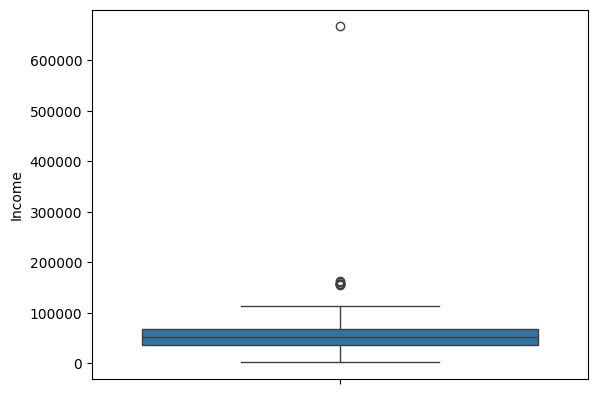

In [ ]:
# visualizing distribution using Boxplot
sns.boxplot(sales['Income'])
plt.show()


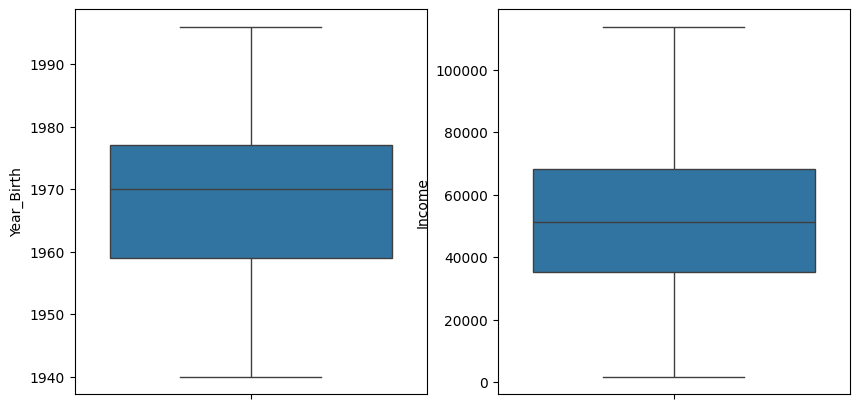

In [ ]:
# Box Plot income without outliers
q1 = sales['Income'].quantile(0.25)
q3 = sales['Income'].quantile(0.75)
iqr = q3 - q1
lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5*iqr
income_without_outliers = sales[(sales['Income'] >= lower_bound) & (sales['Income'] <= upper_bound)]

# age without outliers
q1 = income_without_outliers['Year_Birth'].quantile(0.25)
q3 = income_without_outliers['Year_Birth'].quantile(0.75)
iqr = q3 - q1

lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5*iqr
age_without_outliers = income_without_outliers[(income_without_outliers['Year_Birth'] >= lower_bound) & (income_without_outliers['Year_Birth'] <= upper_bound)]

fig,axes = plt.subplots(figsize =(10,5),nrows=1,ncols=2)
sns.boxplot(age_without_outliers['Year_Birth'],ax= axes[0])
sns.boxplot(income_without_outliers['Income'],ax= axes[1])
plt.show()

In [ ]:
print(age_without_outliers.shape,income_without_outliers.shape)

(2205, 22) (2208, 22)


In [ ]:
# Checking numerical description for value imputation
sales.describe()

,Id,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Response,Complain
count,2240.000000,2240.000000,2216.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000
mean,5592.159821,1968.805804,52247.251354,0.444196,0.506250,49.109375,303.935714,26.302232,166.950000,37.525446,27.062946,44.021875,2.325000,4.084821,2.662054,5.790179,5.316518,0.149107,0.009375
std,3246.662198,11.984069,25173.076661,0.538398,0.544538,28.962453,336.597393,39.773434,225.715373,54.628979,41.280498,52.167439,1.932238,2.778714,2.923101,3.250958,2.426645,0.356274,0.096391
min,0.000000,1893.000000,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2828.250000,1959.000000,35303.000000,0.000000,0.000000,24.000000,23.750000,1.000000,16.000000,3.000000,1.000000,9.000000,1.000000,2.000000,0.000000,3.000000,3.000000,0.000000,0.000000
50%,5458.500000,1970.000000,51381.500000,0.000000,0.000000,49.000000,173.500000,8.000000,67.000000,12.000000,8.000000,24.000000,2.000000,4.000000,2.000000,5.000000,6.000000,0.000000,0.000000
75%,8427.750000,1977.000000,68522.000000,1.000000,1.000000,74.000000,504.250000,33.000000,232.000000,50.000000,33.000000,56.000000,3.000000,6.000000,4.000000,8.000000,7.000000,0.000000,0.000000
max,11191.000000,1996.000000,666666.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,263.000000,362.000000,15.000000,27.000000,28.000000,13.000000,20.000000,1.000000,1.000000


In [ ]:
# As the mean value is 52000 so Randomly generated value within 10000 range and assigned it to null values
random_values = np.random.randint(45000,55000,sales['Income'].isna().sum())
sales['Income'][sales['Income'].isnull()] = random_values

In [ ]:
# null vlaues in inocme column is replaced by random values
sales.isna().sum()

,0
Id,0
Year_Birth,0
Education,0
Marital_Status,0
Income,0
Kidhome,0
Teenhome,0
Dt_Customer,0
Recency,0
MntWines,0


##Task 2 - Descriptive Statistics 📊

- **Calculate measures of central tendency (mean, median, mode) and measures of dispersion (variance, standard deviation) for key variables. Identify and handle outliers if necessary.**


**Deliverables**:

- **Descriptive statistics that reveal the central tendencies, variations, and potential outliers in the dataset.**:

  

In [ ]:
# total no. of customers
sales["Id"].nunique()

2240

In [ ]:
# Calculating Frequecy & Total Amount by Customer
sales["Frequency"] = sales["NumDealsPurchases"]+sales["NumCatalogPurchases"]+sales["NumStorePurchases"]+sales["NumWebPurchases"]
sales["Total Amount"]= sales["MntFishProducts"]+sales["MntMeatProducts"]+sales["MntFruits"]+sales["MntSweetProducts"]+sales["MntWines"]+sales["MntGoldProds"]


In [ ]:
# checking the numerical description of RFM
sales[["Id","Income","Recency","Frequency","Total Amount"]].describe()

,Id,Income,Recency,Frequency,Total Amount
count,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000
mean,5592.159821,52222.383036,49.109375,14.862054,605.798214
std,3246.662198,25040.255289,28.962453,7.677173,602.249288
min,0.000000,1730.000000,0.000000,0.000000,5.000000
25%,2828.250000,35538.750000,24.000000,8.000000,68.750000
50%,5458.500000,51277.000000,49.000000,15.000000,396.000000
75%,8427.750000,68289.750000,74.000000,21.000000,1045.500000
max,11191.000000,666666.000000,99.000000,44.000000,2525.000000


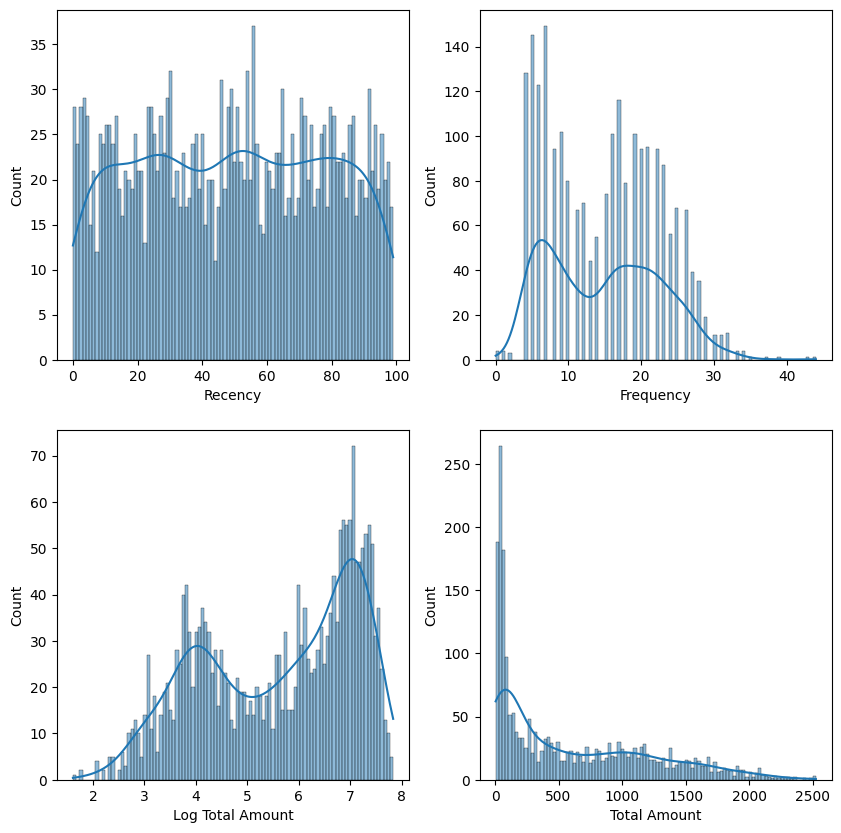

In [ ]:
#applying log transformation
sales["Log Total Amount"] = np.log(sales["Total Amount"])

# plotting histogram for visualization
fig,axes = plt.subplots(figsize =(10,10),nrows=2,ncols=2)

sns.histplot(sales["Recency"],bins = 100,kde =True,ax= axes[0,0])
sns.histplot(sales["Frequency"],bins =100,kde =True,ax= axes[0,1])
sns.histplot(sales["Log Total Amount"],bins =100,kde =True,ax=axes[1,0])
sns.histplot(sales["Total Amount"],bins =100,kde =True,ax=axes[1,1])

plt.show()


From the above graph it can be seen that plotting that

**Rcency:- It can be seen that all the customers are recent customers.**

**Frequency:- Some customers are frequent due to availability of offers.**

**Monetary:- The Log Total amount shows Bimodal nature means two types of spending habits found one category with low spending habit & other one with high spending habit.**


## Task 3 - Probability Distributions 🎲

- **Identify variables that could follow specific probability distributions (e.g., Binomial, Normal). Calculate probabilities and expected values based on these distributions.**



**Deliverables**:

- **Determination of suitable probability distributions for relevant variables and corresponding calculated probabilities and expected values.**:

  

In [ ]:
# Calculate the probability of a customer accepting the offer (Response = 1)
sum = age_without_outliers['Response'].sum()
count = age_without_outliers['Response'].count()
probability_accept = (sum/count)*100

print(f"Probability of accepting the offer: {probability_accept:.4f}")

Probability of accepting the offer: 15.1020


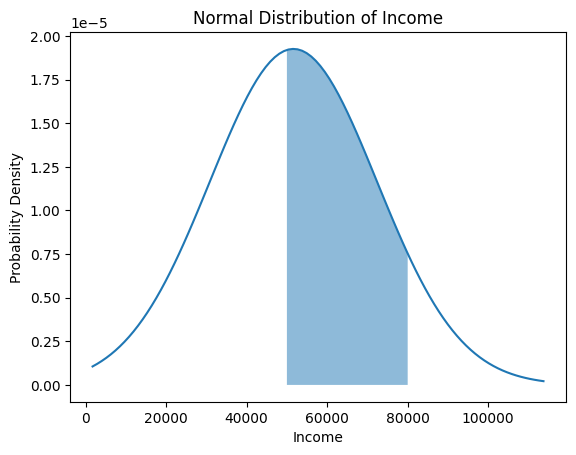

In [ ]:
# Calculating Probability Density function on Income using normal distribution
income_mean= age_without_outliers["Income"].mean()
income_std = age_without_outliers['Income'].std()

x = np.linspace(age_without_outliers['Income'].min(), age_without_outliers['Income'].max(), 100)
y = stats.norm.pdf(x,income_mean, income_std)

x_fill = np.linspace(50000, 80000, 100)                               # min value = 50000 & max value = 80000
y_fill = stats.norm.pdf(x_fill, loc=income_mean, scale=income_std)
plt.fill_between(x_fill, y_fill, alpha=0.5)

plt.plot(x,y)
plt.xlabel('Income')
plt.ylabel('Probability Density')
plt.title('Normal Distribution of Income')
plt.show()

**The graph shows the normal distribution of Income range. From 50000 to 80000 which is shaded in the above graph gives high sales amount this income bracket can be taken as High Value Customer.**

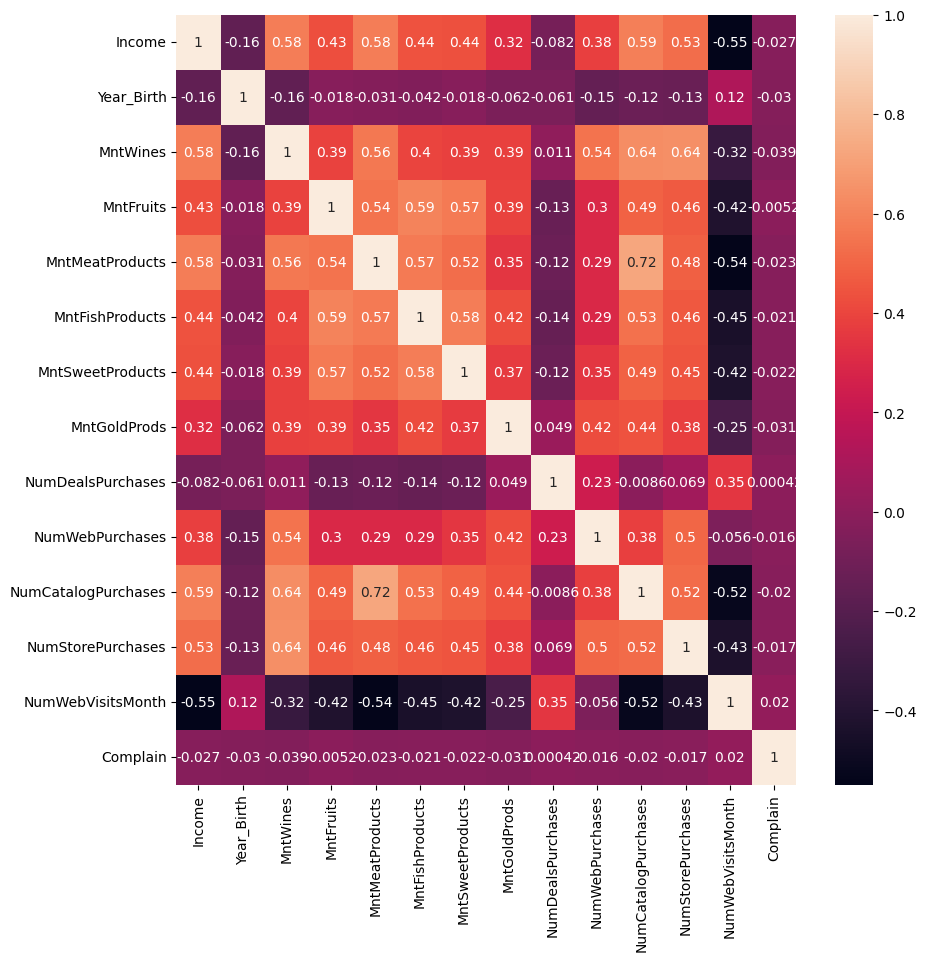

In [ ]:
# Plotting Heat map for different visuals
plt.figure(figsize=(10, 10))
sns.heatmap(sales[["Income","Year_Birth",'MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth', 'Complain']].corr(),annot = True)
plt.show()

In [ ]:
# Calculating offer acceptance behaviour based on Response columns, 1 (means offer accepted), 0 (not accepted)
offer = sales.groupby("Response")[["Recency",'Frequency',"Total Amount","Complain"]].mean()
offer

,Recency,Frequency,Total Amount,Complain
Response,,,,
0,51.514690,14.363589,538.929171,0.009444
1,35.383234,17.706587,987.392216,0.008982


**The above calculation shows that those customer who accepted the offer, has been more frequent to the shop, their average expenditure amount was also high & they have less complain regarding the shop.**

## Task 4: Insights and Customer Segmentation 📈

- **Explore relationships between customer characteristics and spending habits. Segment customers based on their behaviors and characteristics.**

**Deliverables**:

- **Key insights regarding relationships between variables and distinct customer segments based on behaviors.**

  

In [ ]:
# calculating total amout without outliers
age_without_outliers["Total Amount"]= age_without_outliers["MntFishProducts"]+age_without_outliers["MntMeatProducts"]+age_without_outliers["MntFruits"]+age_without_outliers["MntSweetProducts"]+age_without_outliers["MntWines"]+age_without_outliers["MntGoldProds"]

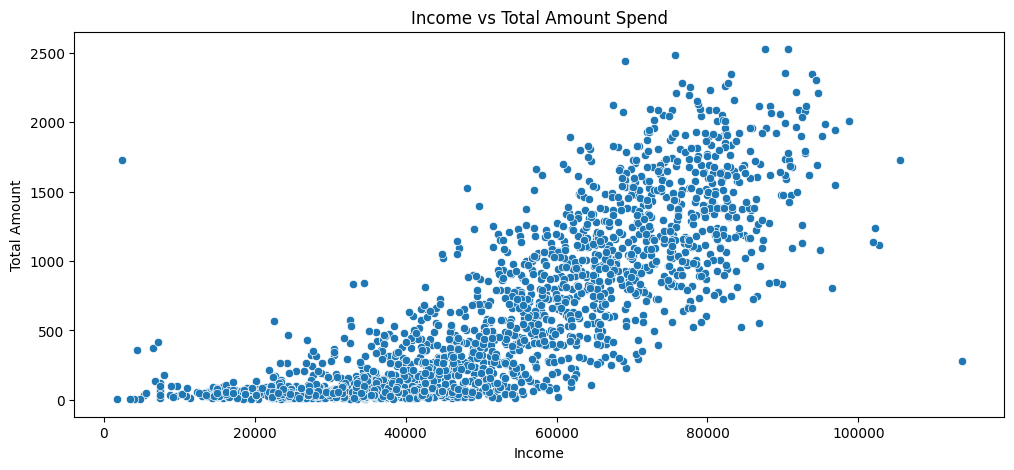

In [ ]:
# Scatter Plot for income vs total amount spend
plt.figure(figsize=(12,5))
sns.scatterplot(x="Income",y="Total Amount",data=age_without_outliers)
plt.title("Income vs Total Amount Spend")
plt.show()

**The above graph Income Vs Total Spends shows that the income range from 50000 the transcation is really high, they have a high chance to increase the revenue of the shop.**

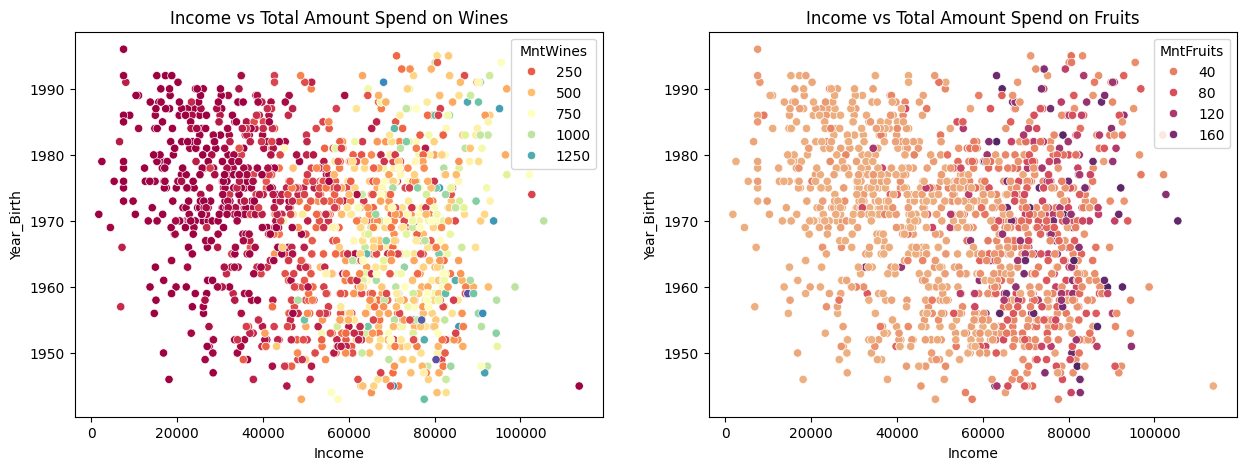

In [ ]:
# calculating values excluding value zero
filtered = age_without_outliers[(age_without_outliers[['MntWines',"MntFruits","MntMeatProducts","MntFishProducts","MntSweetProducts","MntGoldProds"]] !=0).all(axis=1)]
# Scatter plot for visuals Excluding value 0
fig,axes = plt.subplots(figsize =(15,5),nrows=1,ncols=2)
sns.scatterplot(y="Year_Birth",x="Income", hue="MntWines",data=filtered, ax= axes[0],palette="Spectral")
sns.scatterplot(y="Year_Birth",x="Income", hue="MntFruits",data=filtered, ax= axes[1],palette = "flare")

axes[0].set_title("Income vs Total Amount Spend on Wines")
axes[1].set_title("Income vs Total Amount Spend on Fruits")
plt.show()

**The spending on wines & fruits increases after income barcket of 60000**

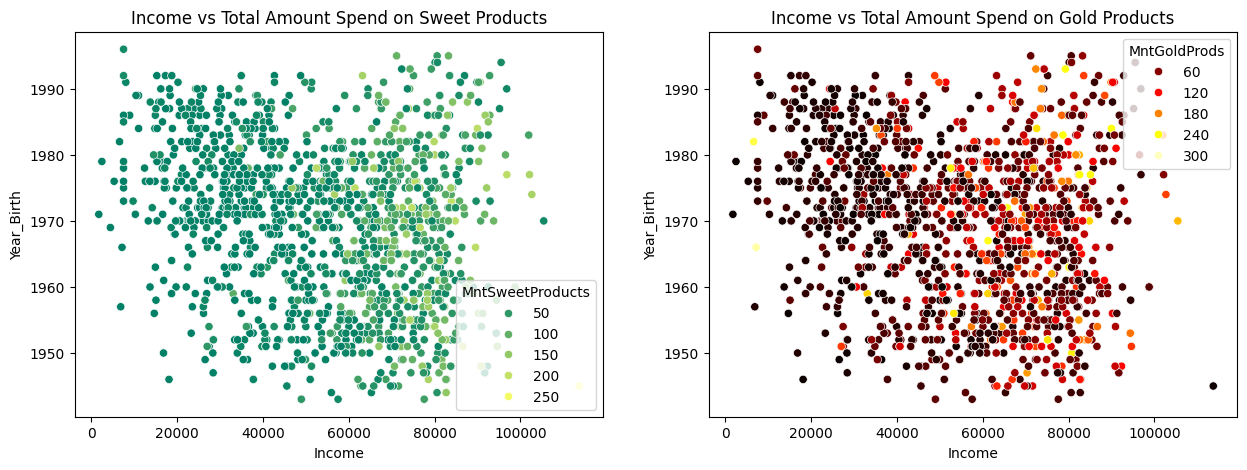

In [ ]:
fig,axes = plt.subplots(figsize =(15,5),nrows=1,ncols=2)
sns.scatterplot(y="Year_Birth",x="Income", hue="MntSweetProducts",data=filtered, ax= axes[0], palette ="summer")
sns.scatterplot(y="Year_Birth",x="Income", hue="MntGoldProds",data=filtered, ax= axes[1],palette="hot")

axes[1].set_title("Income vs Total Amount Spend on Gold Products")
axes[0].set_title("Income vs Total Amount Spend on Sweet Products")
plt.show()

**The spending on Sweets also increase from 60000 but Gold Products spending is not directly realted to Income.The plot shows that lower bracket income also purchased gold compared to higher income, which give me sense people take gold products as Asset.**

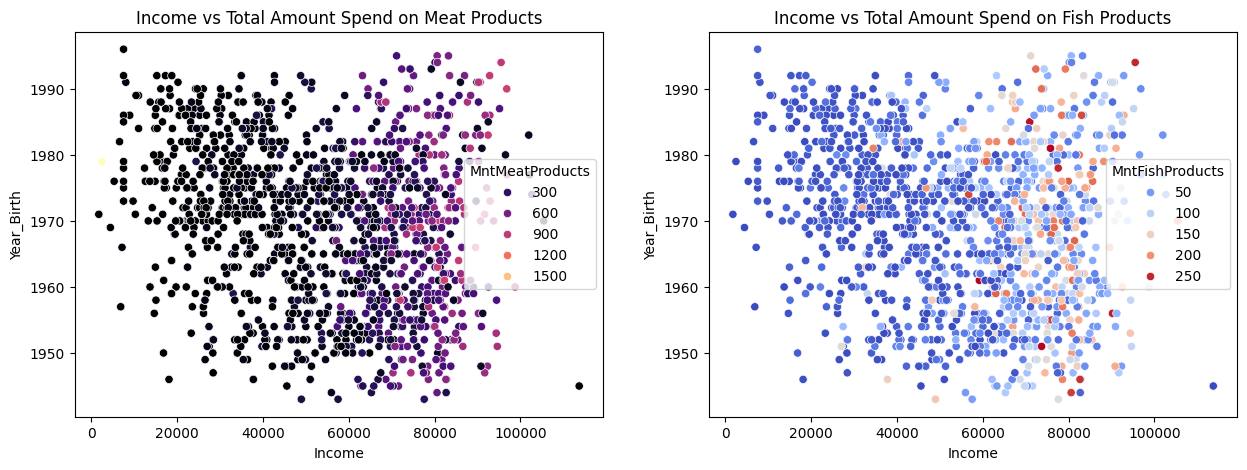

In [ ]:
fig,axes = plt.subplots(figsize =(15,5),nrows=1,ncols=2)
sns.scatterplot(y="Year_Birth",x="Income", hue="MntMeatProducts",data=filtered, ax= axes[0], palette= "magma")
sns.scatterplot(y="Year_Birth",x="Income", hue="MntFishProducts",data=filtered, ax= axes[1], palette="coolwarm")
axes[0].set_title("Income vs Total Amount Spend on Meat Products")
axes[1].set_title("Income vs Total Amount Spend on Fish Products")
plt.show()

**Spending on Meat Products & Fish Products also depends on higher income zone.**

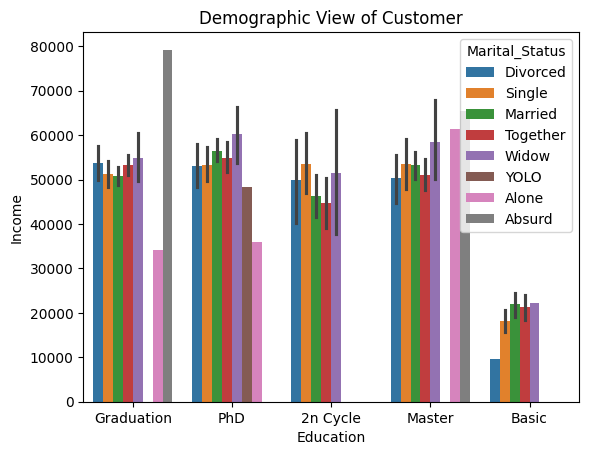

In [ ]:
# Demographic View of Customer
sns.barplot(x="Education",y="Income",data=age_without_outliers,hue="Marital_Status")
plt.title("Demographic View of Customer")
plt.show()

**The above chart displays different types of Customer with Marital Status with their respective Education and Incomes.**

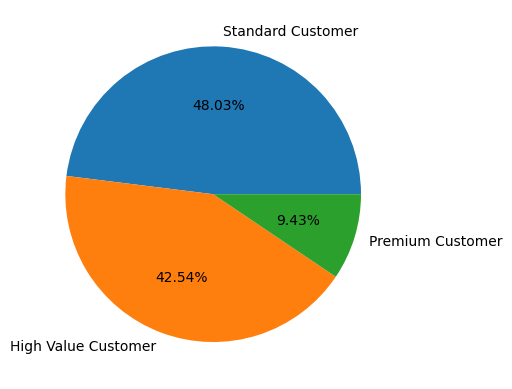

In [ ]:
# Calculating 3 types of customers
standard_customer = age_without_outliers[age_without_outliers["Income"]<= 50000]
high_value_customer= age_without_outliers[(age_without_outliers["Income"] <= 80000) & (age_without_outliers["Income"] >= 50000)]
premium_customer = age_without_outliers[age_without_outliers["Income"] > 80000]

# Ploting Pie Chart
plt.pie([standard_customer.shape[0],high_value_customer.shape[0],premium_customer.shape[0]],labels=["Standard Customer","High Value Customer","Premium Customer"],autopct="%.2f%%")
plt.show()

**I have found out three types of customers based on their Income**

*Standard Customer - 1250 to 50000*

*High Value Customer - 50000 to 80000*

*Premuim Customer - above 8000*

## Task 5: Conclusion and Recommendations

- **Create clear visualizations to showcase your findings. Use insights to make recommendations for the company based on your analysis.**

**Deliverables**:

- **Well-designed visualizations that visually represent your insights and actionable recommendations based on customer behavior analysis.**

#**Conclusions:-**

From the above Data Analysis I have forund out some key facts about Customers


*   At first view of dataset there was 24 null values in Income column, I generated random values from 45000 -55000 to replace the null values, as the mean of dataset was around 52000 so I choose the value.
*   Then I removed the outliers form **Income & Birth Year** as I took this two column as a base reference for Analysing whole dataset.
* Then I calculated **RFM(Recency,Frequency & Moneatry)** & plotted the graph, where I can see that most of its customers are recent customers, some are frequent & two types of spending habits found.
* The offer acceptance was 15% which is very low, but the person those who accepted the offer were more Frequent have less compalint & more Recent to stores.
* It was seen from a plot that after Income level above 50000 customers purchased in high amount, which increases the revenue of shop.
* Different types of product were also bought by High Value Customers except Gold which was equally bought buy all types of customers.
* I have found out three types of customers based on their Income.**Standard Customer - 1250 to 50000,High Value Customer - 50000 to 80000 & Premuim Customer - above 80000**

#**Recommendations

* Design a type of offer for Standard customer to increase sales.
* Gives various types of offer to different **Education Background & Marital Status.**
* Take the complaint & feedback and work on it.
* Provide some premium product for High Value Customers to increase sales.
* Give best Experiences to the Premium Customers to make them feel important as if they are partner of stores can also boost Stores sales.
* Make Packaging **Attractive** for products to give premium feel to customers, which will give them impulse buying.
